In [14]:
#To library the packages needed
install.packages("plotROC")
install.packages("pROC")
library(dplyr)
library(psych)
library(ISLR)
library(kableExtra)
library(RColorBrewer)
library(ggplot2)
library(readxl)
library("gridExtra")
library(InformationValue)
library(pscl)

library(caret)
library(plotROC)
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘XML’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘gridSVG’, ‘shiny’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:plotROC’:

    ggroc


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [15]:
#Request the data set
data(College)

In [16]:
#Remove scientific notation
options(scipen = 999)

In [ ]:
#Descriptive Statistics
des <- psych::describe(College, omit = T) %>%
  select(n, mean, sd, median, min, max, range)
#Create 3-line table
round(des, 1) %>%
  kbl(caption = "Table 1") %>%
  kable_classic(full_width = F, html_font = "Cambria")

<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Table 1</caption>
 <thead>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> sd </th>
   <th style="text-align:right;"> median </th>
   <th style="text-align:right;"> min </th>
   <th style="text-align:right;"> max </th>
   <th style="text-align:right;"> range </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Apps </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 3001.6 </td>
   <td style="text-align:right;"> 3870.2 </td>
   <td style="text-align:right;"> 1558.0 </td>
   <td style="text-align:right;"> 81.0 </td>
   <td style="text-align:right;"> 48094.0 </td>
   <td style="text-align:right;"> 48013.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Accept </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 2018.8 </td>
   <td style="text-align:right;"> 2451.1 </td>
   <td style="text-align:right;"> 1110.0 </td>
   <td style="text-align:right;"> 72.0 </td>
   <td style="text-align:right;"> 26330.0 </td>
   <td style="text-align:right;"> 26258.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Enroll </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 780.0 </td>
   <td style="text-align:right;"> 929.2 </td>
   <td style="text-align:right;"> 434.0 </td>
   <td style="text-align:right;"> 35.0 </td>
   <td style="text-align:right;"> 6392.0 </td>
   <td style="text-align:right;"> 6357.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Top10perc </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 27.6 </td>
   <td style="text-align:right;"> 17.6 </td>
   <td style="text-align:right;"> 23.0 </td>
   <td style="text-align:right;"> 1.0 </td>
   <td style="text-align:right;"> 96.0 </td>
   <td style="text-align:right;"> 95.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Top25perc </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 55.8 </td>
   <td style="text-align:right;"> 19.8 </td>
   <td style="text-align:right;"> 54.0 </td>
   <td style="text-align:right;"> 9.0 </td>
   <td style="text-align:right;"> 100.0 </td>
   <td style="text-align:right;"> 91.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> F.Undergrad </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 3699.9 </td>
   <td style="text-align:right;"> 4850.4 </td>
   <td style="text-align:right;"> 1707.0 </td>
   <td style="text-align:right;"> 139.0 </td>
   <td style="text-align:right;"> 31643.0 </td>
   <td style="text-align:right;"> 31504.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> P.Undergrad </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 855.3 </td>
   <td style="text-align:right;"> 1522.4 </td>
   <td style="text-align:right;"> 353.0 </td>
   <td style="text-align:right;"> 1.0 </td>
   <td style="text-align:right;"> 21836.0 </td>
   <td style="text-align:right;"> 21835.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Outstate </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 10440.7 </td>
   <td style="text-align:right;"> 4023.0 </td>
   <td style="text-align:right;"> 9990.0 </td>
   <td style="text-align:right;"> 2340.0 </td>
   <td style="text-align:right;"> 21700.0 </td>
   <td style="text-align:right;"> 19360.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Room.Board </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 4357.5 </td>
   <td style="text-align:right;"> 1096.7 </td>
   <td style="text-align:right;"> 4200.0 </td>
   <td style="text-align:right;"> 1780.0 </td>
   <td style="text-align:right;"> 8124.0 </td>
   <td style="text-align:right;"> 6344.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Books </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 549.4 </td>
   <td style="text-align:right;"> 165.1 </td>
   <td style="text-align:right;"> 500.0 </td>
   <td style="text-align:right;"> 96.0 </td>
   <td style="text-align:right;"> 2340.0 </td>
   <td style="text-align:right;"> 2244.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Personal </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 1340.6 </td>
   <td style="text-align:right;"> 677.1 </td>
   <td style="text-align:right;"> 1200.0 </td>
   <td style="text-align:right;"> 250.0 </td>
   <td style="text-align:right;"> 6800.0 </td>
   <td style="text-align:right;"> 6550.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> PhD </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 72.7 </td>
   <td style="text-align:right;"> 16.3 </td>
   <td style="text-align:right;"> 75.0 </td>
   <td style="text-align:right;"> 8.0 </td>
   <td style="text-align:right;"> 103.0 </td>
   <td style="text-align:right;"> 95.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Terminal </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 79.7 </td>
   <td style="text-align:right;"> 14.7 </td>
   <td style="text-align:right;"> 82.0 </td>
   <td style="text-align:right;"> 24.0 </td>
   <td style="text-align:right;"> 100.0 </td>
   <td style="text-align:right;"> 76.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> S.F.Ratio </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 14.1 </td>
   <td style="text-align:right;"> 4.0 </td>
   <td style="text-align:right;"> 13.6 </td>
   <td style="text-align:right;"> 2.5 </td>
   <td style="text-align:right;"> 39.8 </td>
   <td style="text-align:right;"> 37.3 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> perc.alumni </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 22.7 </td>
   <td style="text-align:right;"> 12.4 </td>
   <td style="text-align:right;"> 21.0 </td>
   <td style="text-align:right;"> 0.0 </td>
   <td style="text-align:right;"> 64.0 </td>
   <td style="text-align:right;"> 64.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Expend </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 9660.2 </td>
   <td style="text-align:right;"> 5221.8 </td>
   <td style="text-align:right;"> 8377.0 </td>
   <td style="text-align:right;"> 3186.0 </td>
   <td style="text-align:right;"> 56233.0 </td>
   <td style="text-align:right;"> 53047.0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Grad.Rate </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 65.5 </td>
   <td style="text-align:right;"> 17.2 </td>
   <td style="text-align:right;"> 65.0 </td>
   <td style="text-align:right;"> 10.0 </td>
   <td style="text-align:right;"> 118.0 </td>
   <td style="text-align:right;"> 108.0 </td>
  </tr>
</tbody>
</table>

In [ ]:
#Subgroup Descriptive Statistics
nopri <- table(College$Private)
barplot(nopri)

private <- subset(College, Private == "Yes")
nprivate <- subset(College, Private == "No")

prides <- psych::describe(private, omit = T)%>%
  select(n, mean, sd, median, range)
nprides <- psych::describe(nprivate, omit = T)%>%
  select(n, mean, sd, median, range)

total <- cbind(prides, nprides)
round(total, 0) %>%
  kbl(caption = "Table 3") %>%
  kable_classic(full_width = F, html_font = "Cambria") %>%
  add_header_above(c("" , "Private" = 5, "Public" = 5))

<table class=" lightable-classic" style="font-family: Cambria; width: auto !important; margin-left: auto; margin-right: auto;">
<caption>Table 3</caption>
 <thead>
<tr>
<th style="empty-cells: hide;" colspan="1"></th>
<th style="padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="5"><div style="border-bottom: 1px solid #111111; margin-bottom: -1px; ">Private</div></th>
<th style="padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="5"><div style="border-bottom: 1px solid #111111; margin-bottom: -1px; ">Public</div></th>
</tr>
  <tr>
   <th style="text-align:left;">   </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> sd </th>
   <th style="text-align:right;"> median </th>
   <th style="text-align:right;"> range </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> sd </th>
   <th style="text-align:right;"> median </th>
   <th style="text-align:right;"> range </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Apps </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 1978 </td>
   <td style="text-align:right;"> 2443 </td>
   <td style="text-align:right;"> 1133 </td>
   <td style="text-align:right;"> 20111 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 5730 </td>
   <td style="text-align:right;"> 5371 </td>
   <td style="text-align:right;"> 4307 </td>
   <td style="text-align:right;"> 47861 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Accept </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 1306 </td>
   <td style="text-align:right;"> 1370 </td>
   <td style="text-align:right;"> 859 </td>
   <td style="text-align:right;"> 12935 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 3919 </td>
   <td style="text-align:right;"> 3477 </td>
   <td style="text-align:right;"> 2930 </td>
   <td style="text-align:right;"> 26097 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Enroll </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 457 </td>
   <td style="text-align:right;"> 458 </td>
   <td style="text-align:right;"> 328 </td>
   <td style="text-align:right;"> 4580 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 1641 </td>
   <td style="text-align:right;"> 1262 </td>
   <td style="text-align:right;"> 1338 </td>
   <td style="text-align:right;"> 6239 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Top10perc </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 29 </td>
   <td style="text-align:right;"> 18 </td>
   <td style="text-align:right;"> 25 </td>
   <td style="text-align:right;"> 95 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 23 </td>
   <td style="text-align:right;"> 16 </td>
   <td style="text-align:right;"> 19 </td>
   <td style="text-align:right;"> 94 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Top25perc </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 57 </td>
   <td style="text-align:right;"> 20 </td>
   <td style="text-align:right;"> 55 </td>
   <td style="text-align:right;"> 91 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 53 </td>
   <td style="text-align:right;"> 20 </td>
   <td style="text-align:right;"> 51 </td>
   <td style="text-align:right;"> 88 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> F.Undergrad </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 1872 </td>
   <td style="text-align:right;"> 2111 </td>
   <td style="text-align:right;"> 1274 </td>
   <td style="text-align:right;"> 27239 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 8571 </td>
   <td style="text-align:right;"> 6468 </td>
   <td style="text-align:right;"> 6786 </td>
   <td style="text-align:right;"> 31010 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> P.Undergrad </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 434 </td>
   <td style="text-align:right;"> 722 </td>
   <td style="text-align:right;"> 207 </td>
   <td style="text-align:right;"> 10220 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 1978 </td>
   <td style="text-align:right;"> 2321 </td>
   <td style="text-align:right;"> 1375 </td>
   <td style="text-align:right;"> 21827 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Outstate </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 11802 </td>
   <td style="text-align:right;"> 3707 </td>
   <td style="text-align:right;"> 11200 </td>
   <td style="text-align:right;"> 19360 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 6813 </td>
   <td style="text-align:right;"> 2145 </td>
   <td style="text-align:right;"> 6609 </td>
   <td style="text-align:right;"> 13152 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Room.Board </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 4586 </td>
   <td style="text-align:right;"> 1090 </td>
   <td style="text-align:right;"> 4400 </td>
   <td style="text-align:right;"> 5754 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 3748 </td>
   <td style="text-align:right;"> 858 </td>
   <td style="text-align:right;"> 3708 </td>
   <td style="text-align:right;"> 4760 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Books </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 548 </td>
   <td style="text-align:right;"> 175 </td>
   <td style="text-align:right;"> 500 </td>
   <td style="text-align:right;"> 2090 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 554 </td>
   <td style="text-align:right;"> 136 </td>
   <td style="text-align:right;"> 550 </td>
   <td style="text-align:right;"> 1029 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Personal </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 1214 </td>
   <td style="text-align:right;"> 633 </td>
   <td style="text-align:right;"> 1100 </td>
   <td style="text-align:right;"> 6550 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 1677 </td>
   <td style="text-align:right;"> 678 </td>
   <td style="text-align:right;"> 1649 </td>
   <td style="text-align:right;"> 3888 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> PhD </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 71 </td>
   <td style="text-align:right;"> 17 </td>
   <td style="text-align:right;"> 73 </td>
   <td style="text-align:right;"> 92 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 77 </td>
   <td style="text-align:right;"> 12 </td>
   <td style="text-align:right;"> 78 </td>
   <td style="text-align:right;"> 70 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Terminal </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 79 </td>
   <td style="text-align:right;"> 15 </td>
   <td style="text-align:right;"> 81 </td>
   <td style="text-align:right;"> 76 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 83 </td>
   <td style="text-align:right;"> 12 </td>
   <td style="text-align:right;"> 86 </td>
   <td style="text-align:right;"> 67 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> S.F.Ratio </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 13 </td>
   <td style="text-align:right;"> 4 </td>
   <td style="text-align:right;"> 13 </td>
   <td style="text-align:right;"> 37 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 17 </td>
   <td style="text-align:right;"> 3 </td>
   <td style="text-align:right;"> 17 </td>
   <td style="text-align:right;"> 22 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> perc.alumni </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 26 </td>
   <td style="text-align:right;"> 12 </td>
   <td style="text-align:right;"> 25 </td>
   <td style="text-align:right;"> 62 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 14 </td>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 14 </td>
   <td style="text-align:right;"> 48 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Expend </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 10486 </td>
   <td style="text-align:right;"> 5683 </td>
   <td style="text-align:right;"> 8954 </td>
   <td style="text-align:right;"> 53047 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 7458 </td>
   <td style="text-align:right;"> 2696 </td>
   <td style="text-align:right;"> 6716 </td>
   <td style="text-align:right;"> 12922 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Grad.Rate </td>
   <td style="text-align:right;"> 565 </td>
   <td style="text-align:right;"> 69 </td>
   <td style="text-align:right;"> 17 </td>
   <td style="text-align:right;"> 69 </td>
   <td style="text-align:right;"> 103 </td>
   <td style="text-align:right;"> 212 </td>
   <td style="text-align:right;"> 56 </td>
   <td style="text-align:right;"> 15 </td>
   <td style="text-align:right;"> 55 </td>
   <td style="text-align:right;"> 90 </td>
  </tr>
</tbody>
</table

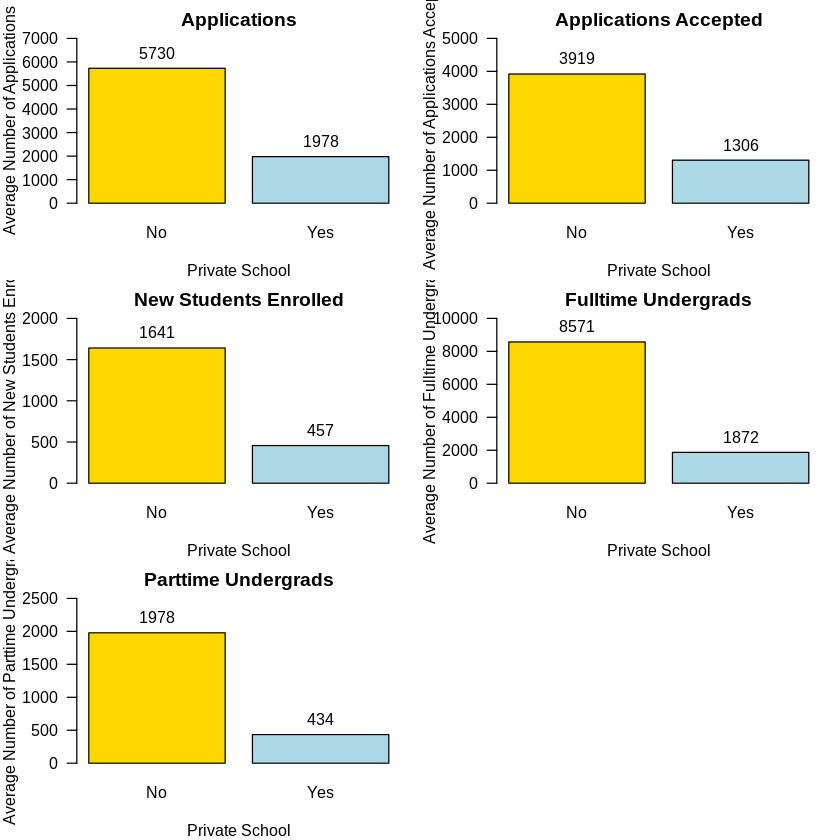

In [21]:
#Bar chart of Average Number of Applications
par(mfrow = c(3, 2),cex=0.8, mai=c(4,4,2,1), mar=c(4,4,2,1))
appmean <- tapply(College$Apps, INDEX = College$Private, mean)
plot1 <- barplot(appmean, ylim = c(0, 7000), col = c("gold", "lightblue"), xlab = "Private School", ylab = "Average Number of Applications", las =1, cex.axis = 1, cex.names = 1, main = "Applications")
text(y = round(appmean,0),
     plot1,
     round(appmean,0),
     cex = 1,
     pos = 3)

#Bar chart of Average Number of Applications Accepted
acptmean <- tapply(College$Accept, INDEX = College$Private, mean)
plot2 <- barplot(acptmean, ylim = c(0, 5000), col = c("gold", "lightblue"), xlab = "Private School", ylab = "Average Number of Applications Accepted", las =1, cex.axis = 1, cex.names = 1, main = "Applications Accepted")
text(y = round(acptmean,0),
     plot2,
     round(acptmean,0),
     cex = 1,
     pos = 3)

#Bar chart of Average Number of New Students Enrolled
enrollmean <- tapply(College$Enroll, INDEX = College$Private, mean)
plot3 <- barplot(enrollmean, ylim = c(0, 2000), col = c("gold", "lightblue"), xlab = "Private School", ylab = "Average Number of New Students Enrolled", las =1, cex.axis = 1, cex.names = 1, main = "New Students Enrolled")
text(y = round(enrollmean,0),
     plot3,
     round(enrollmean,0),
     cex = 1,
     pos = 3)

#Bar chart of Average Number of Fulltime Undergrads
fundermean <- tapply(College$F.Undergrad, INDEX = College$Private, mean)
plot4 <- barplot(fundermean, ylim = c(0, 10000), col = c("gold", "lightblue"), xlab = "Private School", ylab = "Average Number of Fulltime Undergrads", las =1, cex.axis = 1, cex.names = 1, main = "Fulltime Undergrads")
text(y = round(fundermean,0),
     plot4,
     round(fundermean,0),
     cex = 1,
     pos = 3)

#Bar chart of Average Number of Parttime Undergrads
pundermean <- tapply(College$P.Undergrad, INDEX = College$Private, mean)
plot5 <- barplot(pundermean, ylim = c(0, 2500), col = c("gold", "lightblue"), xlab = "Private School", ylab = "Average Number of Parttime Undergrads", las =1, cex.axis = 1, cex.names = 1, main = "Parttime Undergrads")
text(y = round(pundermean,0),
     plot5,
     round(pundermean,0),
     cex = 1,
     pos = 3)

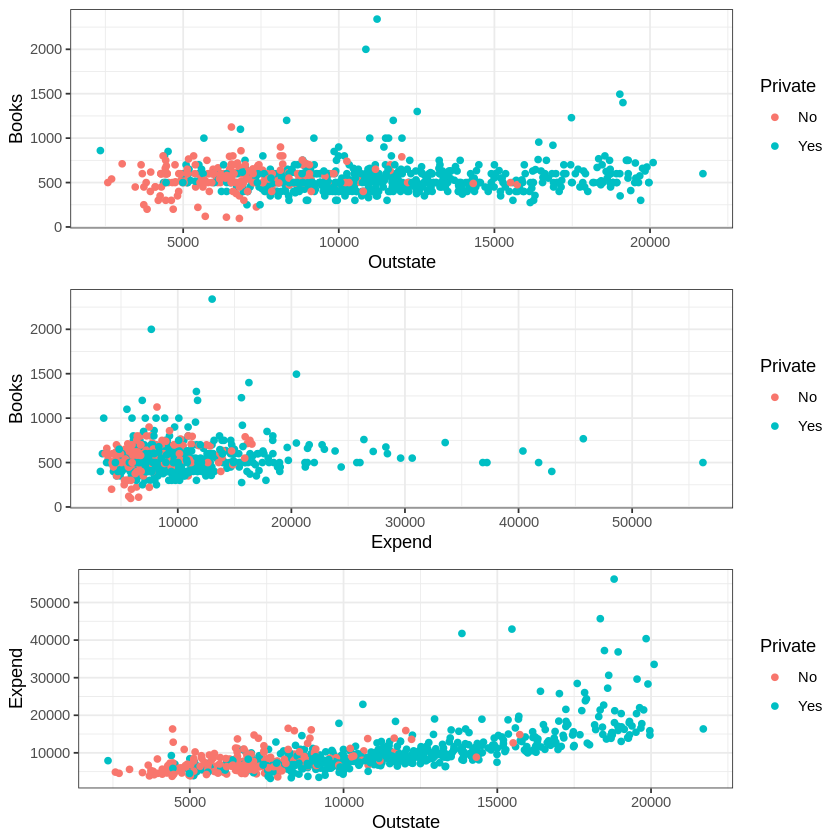

In [22]:
#Box plots of Out-of-state tuition, Estimated Book Cost, Instructional Expenditure per Student
par(mfrow = c(2, 2),cex=0.8, mai=c(4,4,2,1), mar=c(4,4,2,1))

boxplot(College$Outstate ~ College$Private, col = c("gold", "lightblue"), xlab = "Private University", ylab = "Out-of-state tuition", main = "Out-of-state tuition", pch = 16)

boxplot(College$Books ~ College$Private, col = c("gold", "lightblue"), xlab = "Private University", ylab = "Estimated Book Cost", main = "Estimated Book Cost", pch = 16)

boxplot(College$Expend ~ College$Private, col = c("gold", "lightblue"), xlab = "Private University", ylab = "Instructional Expenditure per Student", main = "Instructional Expenditure per Student", pch = 16)        

#Scatter Plots
g1 <- ggplot(College, aes(x= Outstate, y = Books, color = Private)) + geom_point() + theme_bw()
g2 <- ggplot(College, aes(x= Expend, y = Books, color = Private)) + geom_point() + theme_bw()
g3 <- ggplot(College, aes(x= Outstate, y = Expend, color = Private)) + geom_point()+ theme_bw()
grid.arrange(g1 , g2 , g3, nrow=3)


In [23]:
#Split the data into a train and test set
set.seed(1)
train <- sort(sample(x=nrow(College), size = nrow(College)*0.7))
sample_train <- College[train,]
sample_test <- College[-train,]

In [34]:

#Fit the model
model1 <- glm(Private ~ Apps + Accept + Enroll  + F.Undergrad + P.Undergrad + Outstate + Books + perc.alumni + Expend, data = sample_train, family = binomial(link = "logit"))
summary(model1)

model2 <- glm(Private ~ Apps + Accept +  F.Undergrad + Outstate, data = sample_train, family = binomial(link = "logit"))
summary(model2)

model3 <- glm(Private ~Accept +  F.Undergrad + Outstate, data = sample_train, family = binomial(link = "logit"))
summary(model3)


model4 <- glm(Private ~ F.Undergrad + Outstate, data = sample_train, family = binomial(link = "logit"))
summary(model4)




Call:
glm(formula = Private ~ Apps + Accept + Enroll + F.Undergrad + 
    P.Undergrad + Outstate + Books + perc.alumni + Expend, family = binomial(link = "logit"), 
    data = sample_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3989  -0.0030   0.0924   0.2473   3.9191  

Coefficients:
               Estimate  Std. Error z value    Pr(>|z|)    
(Intercept) -4.12262740  1.04600312  -3.941 0.000081036 ***
Apps        -0.00053026  0.00026652  -1.990    0.046635 *  
Accept       0.00118711  0.00055381   2.144    0.032070 *  
Enroll       0.00050561  0.00111942   0.452    0.651507    
F.Undergrad -0.00098478  0.00026333  -3.740    0.000184 ***
P.Undergrad  0.00003017  0.00018388   0.164    0.869661    
Outstate     0.00056272  0.00010667   5.275 0.000000132 ***
Books        0.00087508  0.00131876   0.664    0.506968    
perc.alumni  0.03091005  0.02244716   1.377    0.168508    
Expend       0.00018327  0.00011147   1.644    0.100138    
---
Signif. codes:  


Call:
glm(formula = Private ~ Apps + Accept + F.Undergrad + Outstate, 
    family = binomial(link = "logit"), data = sample_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5774  -0.0025   0.1024   0.2664   3.5916  

Coefficients:
               Estimate  Std. Error z value            Pr(>|z|)    
(Intercept) -2.78189343  0.60555338  -4.594 0.00000434894053742 ***
Apps        -0.00034851  0.00021168  -1.646              0.0997 .  
Accept       0.00102919  0.00045011   2.287              0.0222 *  
F.Undergrad -0.00092696  0.00020331  -4.559 0.00000513047355600 ***
Outstate     0.00069547  0.00008486   8.195 0.00000000000000025 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 619.86  on 542  degrees of freedom
Residual deviance: 199.46  on 538  degrees of freedom
AIC: 209.46

Number of Fisher Scoring iterations: 7



Call:
glm(formula = Private ~ Accept + F.Undergrad + Outstate, family = binomial(link = "logit"), 
    data = sample_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.5555  -0.0026   0.1035   0.2768   3.5713  

Coefficients:
              Estimate Std. Error z value             Pr(>|z|)    
(Intercept) -2.7165424  0.6200165  -4.381 0.000011791716442176 ***
Accept       0.0004773  0.0002960   1.612                0.107    
F.Undergrad -0.0009148  0.0001978  -4.624 0.000003761709486522 ***
Outstate     0.0006887  0.0000854   8.065 0.000000000000000733 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 619.86  on 542  degrees of freedom
Residual deviance: 201.89  on 539  degrees of freedom
AIC: 209.89

Number of Fisher Scoring iterations: 7



Call:
glm(formula = Private ~ F.Undergrad + Outstate, family = binomial(link = "logit"), 
    data = sample_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6459  -0.0040   0.1000   0.2696   3.0663  

Coefficients:
               Estimate  Std. Error z value             Pr(>|z|)    
(Intercept) -3.09404398  0.58076179  -5.328 0.000000099540252457 ***
F.Undergrad -0.00064045  0.00007889  -8.119 0.000000000000000471 ***
Outstate     0.00073716  0.00008313   8.868 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 619.86  on 542  degrees of freedom
Residual deviance: 204.47  on 540  degrees of freedom
AIC: 210.47

Number of Fisher Scoring iterations: 7


In [35]:
#To calculate the log odds and odds ratios 
coef(model4)
exp(coef(model4))

(Intercept)   F.Undergrad      Outstate 
-3.0940439768 -0.0006404543  0.0007371632

(Intercept) F.Undergrad    Outstate 
 0.04531832  0.99935975  1.00073743

In [36]:
#Create data set to see how probability changes for different values of out-of-state tuition
test <- data.frame(Outstate = c(min(College$Outstate), mean(College$Outstate), max(College$Outstate)), F.Undergrad =  c(mean(College$F.Undergrad)))

test$probs <- predict(model4, test, type = "response")                                
test                   


Outstate,F.Undergrad,probs
<dbl>,<dbl>,<dbl>
2340.00,3699.907,0.02323234
10440.67,3699.907,0.90315752
21700.00,3699.907,0.99997335


In [37]:
#Train set predictions
trainpredicted <- predict(model4, newdata = sample_train, type = "response")
trainpredictmin <- as.factor(ifelse(trainpredicted >= 0.5, "Yes", "No"))
#Confusion Matrix for model accuracy 
confusionMatrix(trainpredictmin, sample_train$Private, positive = "Yes")

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  118  15
       Yes  22 388
                                             
               Accuracy : 0.9319             
                 95% CI : (0.9073, 0.9516)   
    No Information Rate : 0.7422             
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.819              
                                             
 Mcnemar's Test P-Value : 0.3239             
                                             
            Sensitivity : 0.9628             
            Specificity : 0.8429             
         Pos Pred Value : 0.9463             
         Neg Pred Value : 0.8872             
             Prevalence : 0.7422             
         Detection Rate : 0.7145             
   Detection Prevalence : 0.7551             
      Balanced Accuracy : 0.9028             
                                             
       'Positive

In [38]:
#Test set predictions
testpredicted <- predict(model4, newdata = sample_test, type = "response")
testpredictmin <- as.factor(ifelse(testpredicted >= 0.5, "Yes", "No"))
#Confusion Matrix for model accuracy
confusionMatrix(testpredictmin, sample_test$Private, positive = "Yes")


Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No   66   7
       Yes   6 155
                                             
               Accuracy : 0.9444             
                 95% CI : (0.9069, 0.9701)   
    No Information Rate : 0.6923             
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.8701             
                                             
 Mcnemar's Test P-Value : 1                  
                                             
            Sensitivity : 0.9568             
            Specificity : 0.9167             
         Pos Pred Value : 0.9627             
         Neg Pred Value : 0.9041             
             Prevalence : 0.6923             
         Detection Rate : 0.6624             
   Detection Prevalence : 0.6880             
      Balanced Accuracy : 0.9367             
                                             
       'Positive

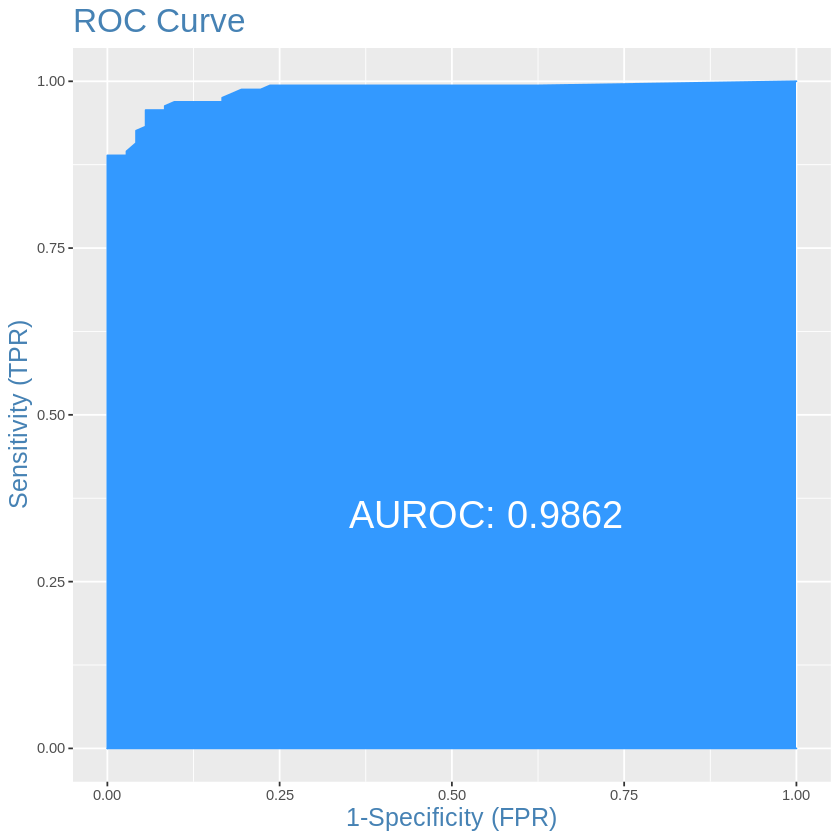

In [41]:
#Plot the ROC 
test2 <- as.factor(ifelse(sample_test$Private == "Yes", "1", "0"))
plotROC(test2, testpredicted)

